In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [164]:
from PIL import Image
from io import BytesIO
def Image2base64(img_path):
    image = Image.open(img_path)
    buffer = BytesIO()
    image.save(buffer, format="PNG")
    image_data = buffer.getvalue()
    base64_encoded_string = base64.b64encode(image_data).decode('utf-8')

    return base64_encoded_string

In [207]:
imgdata1 = Image2base64('./examples/taylor/1-1.png')
imgdata2 = Image2base64('./examples/twoperson/1.jpeg')

In [226]:
import requests
import json

# url = "http://3.85.128.236:8080/invocations"
url = "http://127.0.0.1:8080/invocations"

payload = json.dumps({
  "general_prompt": "[Alice] a woman img\n[Bob]a man img",
  "negative_prompt": "naked, deformed, bad anatomy, disfigured, poorly drawn face, mutation, extra limb, ugly, disgusting, poorly drawn hands, missing limb, floating limbs, disconnected limbs, blurry, watermarks, oversaturated, distorted hands, amputation",
  "prompt_array": '\n'.join(
      [
                "[Bob] at home, read new paper #at home, The newspaper says there is a treasure house in the forest.",
                        "[Bob] on the road, near the forest",
                        "[Alice] is make a call at home # [Bob] invited [Alice] to join him on an adventure.",
                        "[NC] The car on the road, near the forest #They drives to the forest in search of treasure.",
                        "[NC]A tiger appeared in the forest, at night ",
                        "[Bob] very frightened, open mouth, in the forest, at night",
                        "[Alice] very frightened, open mouth, in the forest, at night",
                        "[Bob]  running very fast, in the forest, at night",
                        "[NC] A house in the forest, at night #Suddenly, They discovers the treasure house!",
                        "[Bob]  in the house filled with  treasure, laughing, at night #They are overjoyed inside the house."
                    ]
  ),
   # "style": "Photographic",
    "G_height":768,
    "G_width":768,
    "style":"Japanese Anime",
    "sd_type":"Unstable",
    "files":[imgdata1,imgdata2]
})

# payload = json.dumps({
#   "prompt": "An astronaut riding a horse hd, 8k  ",
#         "G_height":512,
#     "G_width":768,
#     "style_preset":"photograhic"
# })
headers = {
  'Content-Type': 'application/json'
}


In [227]:
response = requests.request("POST", url, headers=headers, data=payload)

print(response)

<Response [200]>


In [ ]:
from io import BytesIO
import base64
from PIL import Image

def base64_to_image(base64_string):
    image_bytes = base64.b64decode(base64_string)
    image_buffer = BytesIO(image_bytes)
    image = Image.open(image_buffer)
    return image

In [ ]:
def base64_to_image(base64_string):
    image_bytes = base64.b64decode(base64_string)
    image_buffer = BytesIO(image_bytes)
    image = Image.open(image_buffer)
    return image

In [ ]:
for img in response.json()['images_base64']:
    # print(img)
    base64_to_image(img).show()

In [141]:
def generate_images_sdxl_api(prompt:str,height:int = 768, width :int = 768,style_preset='photograhic') :
    data = { "prompt": prompt,
            "G_height":height,
            "G_width":width,
            "style_preset":style_preset}
    payload = json.dumps(data)
    headers = {
        'Content-Type': 'application/json'
        }

    url = "http://3.85.128.236:8080/invocations"
    
    response = requests.request("POST", url, headers=headers, data=payload)
    images = []
    for img in response.json()['images_base64']:
        images.append(base64_to_image(img))
    return images[0]

In [144]:
img = generate_images_sdxl_api(prompt='portrait of A confident young woman in a stylish tailored suit with bold accessories, standing in a professional setting with an assertive posture and facial expression, photorealistic, sharp focus, studio lighting')

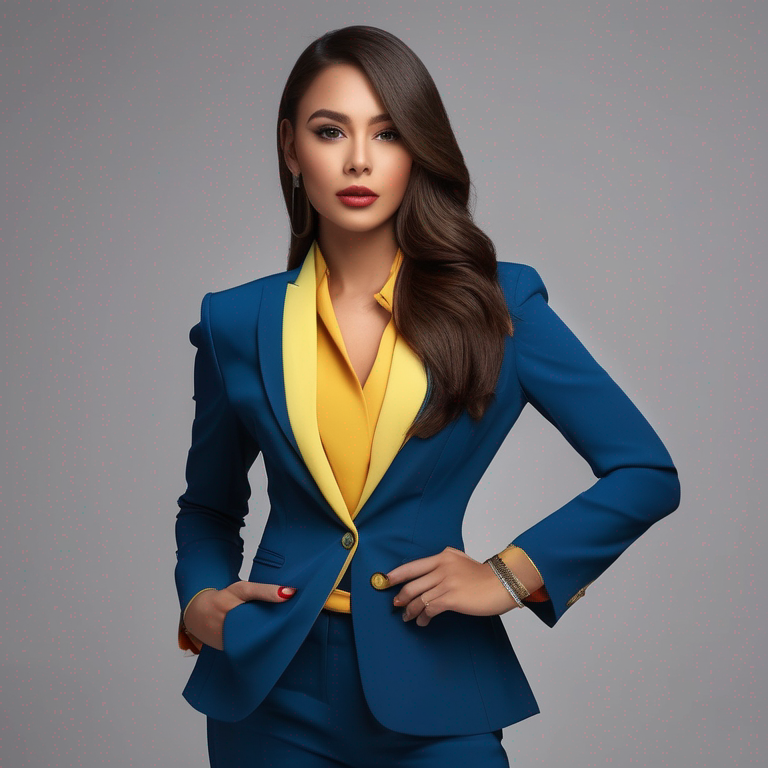

In [145]:
img.show()